#                                       Math Statistics Homework 2
##                                                                    Jie Ma

Problem 2 (Exercise 9.2) Consider $X_{i+1}-\mu = \rho(X_{i}-\mu)+\sigma Z_{i}$, where $Z_{i}$ are iid standard normals. Find the limiting distribution of $\bar{X}$ if $|\rho|<1$.

Solution: let $X_{i}-\mu:=a_{i}.$ By direct sbusituting iteration, we find that 
\begin{align*} a_{i+1} = \sigma \sum_{n=0}^{+\infty} \rho^{n}Z_{i-n}.\end{align*}

Hence, taking expected values, we have that 
\begin{align*}E(X_{i}) = \mu,\end{align*} for all $i$. 

It follows directly that $\mathbb{E}(\bar{X}) = \mu$. We now compute variance. It is not hard to conclude that for any pair of integers $m$ and $n$, the covaraince between $x_{m}$ and $x_{n}$ is 
\begin{align*} cov(x_{m},x_{n}) = \sigma^{2}\rho^{m-n}\frac{1}{1-\rho^{2}},\end{align*}
assuming $m>n$. 

Let $\bar{X} = \frac{1}{k}\sum_{j=1}^{k}X_{j}$. It follows that 
\begin{align*} var(\bar{X}) & = var(\frac{1}{k} \sum_{k=1}^{k}X_{j})
\\ & =  \frac{1}{k^{2}}\left(\sum_{j=1}^{k}var(X_{j})+2\sum_{i\neq j} cov(X_{i},X_{j})\right)
\\ & = \frac{\sigma^{2}}{k^{2}(1-\rho^{2})}\left(k + 2\sum_{i>j} \rho^{i-j}\right)
\\ & = \frac{\sigma^{2}}{k^{2}(1-\rho^{2})}\left[k+2\sum_{j=1}^{k-1}j\rho^{k-j}\right]
\\ &  = \frac{\sigma^{2}}{k^{2}(1-\rho^{2})}\left[k + 2\left((k+1)\frac{1}{\rho} - \frac{2\rho-\rho^{2}}{(1-\rho)^{2}}\right)\right],\end{align*} where we omit higher order $\rho^{n}$ from the last expression for the last term, since in computing limiting distribution, that term can eventually be ignored. Now it follows that 

\begin{align*} \sqrt{k}\cdot var(\bar{X}-\mu) \to \frac{\sigma^{2}}{1-\rho^{2}}\left[1+\frac{2}{\rho}\right].\end{align*}

12.1:

 Question: for n = 25 and 50, estimate $P(max_{1\leq k\leq n} S_{k} > 2\sqrt{n})$, assuming iid $U[0,1]$. Does the distribution matter?

Solution: We simulate this proess in Python 3.5. The code can be seen in the next cell.

In [87]:
import math
import random
n1 = 25;
n2 = 50;
N = 5000; # the number of experiment #
n =[n1,n2];
def main(n):
    sequence = [];
    for i in range(n):
        sequence.append(random.uniform(-1.0,1.0));
    sums = [sequence[0]];
    for j in range(1,n):
        sums.append(sums[j-1] + sequence[j]);
    right_hand_side = 2*math.sqrt(n);
    return True if max(sums) > right_hand_side else False;
    
def count(n,N):
    results =[int(main(n)) for i in range(N)];
    success = sum(results);
    return success/(N+0.0);

print ("when n = 25, the simulation yields the probability", count(n1, N));
print ("when n = 50, the simulation yields the probability", count(n2, N));



when n = 25, the simulation yields the probability 0.0006
when n = 50, the simulation yields the probability 0.0004


Based on above simulation, we conclude that when $n=25$ and $n=50$, the probabilit are $0.08\%$ and $0.06\%$, respectively.

A theoreotical approach to this problem is that since the variance of uniform $[0,1]$ distribution is $1/3$, we notice that 

\begin{align*} P\left(n^{-1/2}max S_{k} \geq 2\sqrt{n}\right)& = 1-P\left(n^{-1/2} S_{k}< x\right)
\\ & =  2-2\Phi\left(2\sqrt{3}\right),\end{align*} where we have normalized the argument in $\Phi$ by $\sqrt{3}$. A theoretical can be seen from the Python code below:

In [5]:
from scipy.stats import norm;
import math;
answer = 2.0 - 2.0 * norm.cdf(2*math.sqrt(3));
answer

0.0005320055051392103

Based on above results, we say that the theoretical result is approximately $0.0532\%$. We did this approximation, with implicitly assuming that $n$ large, no matter 25 or 50, and we only use the fact that the mean of uniform distrubition is $0$ and its variance is $3$. The exact shape of the distribution does not matter.  

12.3:

By Levi Arcsine Law, we learn that 

\begin{align*} P = 1-\frac{2}{\pi}\arcsin{\sqrt{0.6}}.\end{align*} 

12.4:

$f(x) = 0$ for $0\leq x \leq 1/2$, and $f(x) = a$, for $1/2< x \leq 1$, where $a = 1.0, 2.0, 3. 0$ so that three members are found. 

 Problem 2. Generate datasets and then answer questions. 

 (a) We first generate 4 sets of data, for each type of distribution assigned in the homework.

In [6]:
from numpy import random as rd; """import numpy package"""

In [44]:
"""generate samples"""
N = 100;
sample_normal = rd.normal(6,math.sqrt(2),N);
sample_exponential = rd.exponential(2, N);
sample_cauchy = rd.standard_cauchy(N);
sample_gamma = rd.gamma(5,1,N);

print ([len(x) for x in [sample_normal, sample_exponential, sample_cauchy, sample_gamma]]);

[100, 100, 100, 100]


In [67]:
"""Normal distribution MLE estimation"""
normal_esti_mean = 1.0/N*sum(sample_normal);
normal_esti_var = 1.0/(N-1)*sum([(sample-normal_esti_mean)**2 for sample in sample_normal]);
normal_esti_std = math.sqrt(normal_esti_var);
"""Gamma distribution MLE estimation"""
s = math.log(1.0/N * sum(sample_gamma)) - 1.0/N * sum([math.log(sample) for sample in sample_gamma]);
gamma_esti_shape = ((3-s)+math.sqrt((s-3)**2 + 24*s))/(12.0*s);

"""Exponential distribution MLE estimation"""
expo_esti_mean = 1.0/N * sum(sample_exponential);

print ("the estimated mean for the normal distribution is", normal_esti_mean);
print ("the estimated variance for the normal distribution is", normal_esti_var);
print ("the estimated shape for the gamma distribution is", gamma_esti_shape);
print ("the estimated mean for the exponential distribution is", expo_esti_mean);

the estimated mean for the normal distribution is 5.70505403937
the estimated variance for the normal distribution is 2.24029631318
the estimated shape for the gamma distribution is 4.723740679161456
the estimated mean for the exponential distribution is 2.17253471332


We now plot the pdf, based on these parameter estimations. 

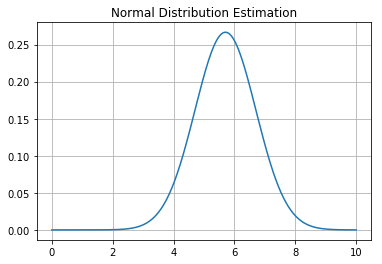

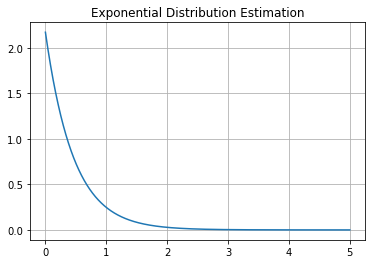

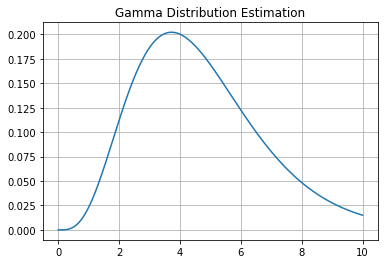

In [84]:
import numpy as np;
import scipy;
import matplotlib.pyplot as plt;  """we are going to draw pictures"""
import scipy.stats as stats;
%matplotlib inline

plt.figure(1)
plt.title("Normal Distribution Estimation")
normal_fun = lambda x: 1.0/(math.sqrt(2*math.pi)*normal_esti_std)*math.exp(-(x-normal_esti_mean)**2/2.0);
x_normal = np.arange(0,10,0.001);
y_normal = list(map(normal_fun, x_normal));
plt.plot(x_normal, y_normal);
#pdf_normal = stats.norm.pdf(sorted(sample_normal), normal_esti_mean, math.sqrt(normal_esti_var))
#plt.plot(sorted(sample_normal), pdf_normal)
plt.grid()



plt.figure(2)
plt.title("Exponential Distribution Estimation");
plt.grid();
exp_fun = lambda x: expo_esti_mean * math.exp(-expo_esti_mean * x )/1.0;
x_exp = np.arange(0,5,0.001);
y_exp = list(map(exp_fun, x_exp));
plt.plot(x_exp, y_exp);


plt.figure(3)
plt.grid();
plt.title("Gamma Distribution Estimation")
a = scipy.special.gamma(gamma_esti_shape);
gamma_fun = lambda x: 1.0/(a) * x**(gamma_esti_shape-1)* math.exp(-x/(1.0));
x_gamma = np.arange(0,10,0.001);
y_gamma = list(map(gamma_fun, x_gamma));
plt.plot(x_gamma, y_gamma);


           

(b) We next examine the histogram for each dataset that was generated with each distribution. 

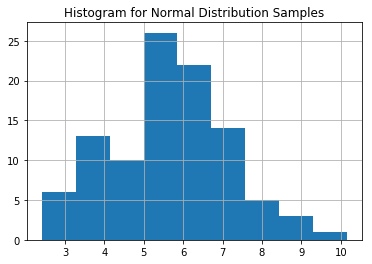

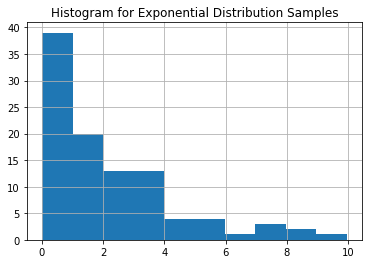

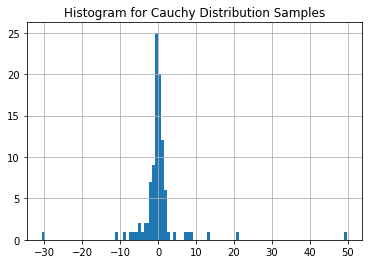

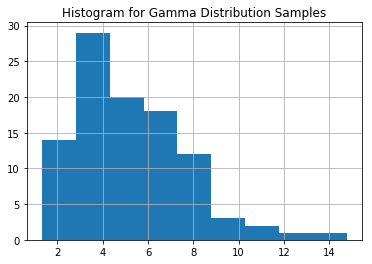

In [103]:
plt.figure(1)
plt.hist(sample_normal, bins = "auto")
plt.grid()
plt.title("Histogram for Normal Distribution Samples")

plt.figure(2)
plt.hist(sample_exponential, bins = "auto")
plt.grid()
plt.title("Histogram for Exponential Distribution Samples")

plt.figure(3)
plt.hist(sample_cauchy, bins = "auto")
plt.grid()
plt.title("Histogram for Cauchy Distribution Samples")

plt.figure(4)
plt.hist(sample_gamma, bins = "auto")
plt.grid()
plt.title("Histogram for Gamma Distribution Samples")

2


(c)

We first plot kernel estimator for Normal distribution. 


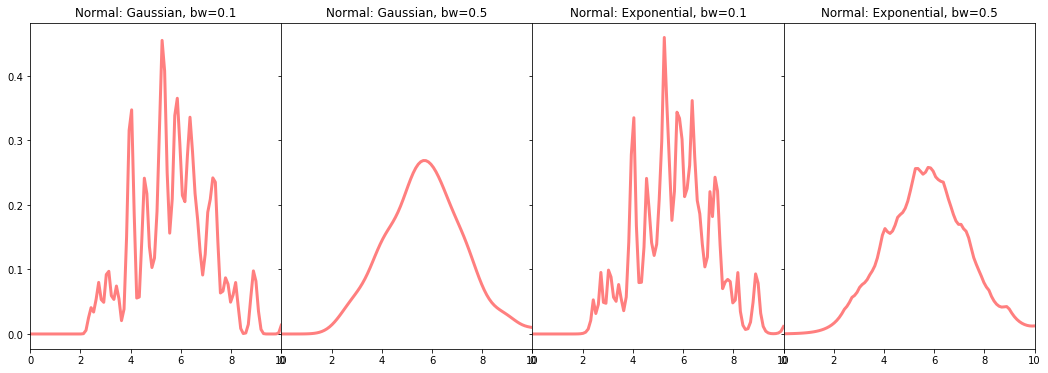

In [150]:
from sklearn.neighbors import KernelDensity
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats.distributions import norm

hours = np.linspace(0,10,100)
freq = sample_normal;
# Plot the kernel density estimates
fig, ax = plt.subplots(1,4, sharey=True, figsize=(18,6))
fig.subplots_adjust(wspace=0)

for (i,bw) in enumerate([0.1,0.5,0.1,0.5]):
    # sklearn
    kde_skl_gaussian = KernelDensity(kernel="gaussian", bandwidth=bw)
    kde_skl_exponential = KernelDensity(kernel="exponential", bandwidth=bw)
    if i == 0 or i == 1:
        kde_skl_gaussian.fit(freq[:,np.newaxis])
        density = np.exp(kde_skl_gaussian.score_samples(hours[:,np.newaxis]))
        ax[i].plot(hours, density, color='red', alpha=0.5, lw=3)
        ax[i].set_title('Normal: Gaussian, bw={0}'.format(bw))
        ax[i].set_xlim(0,10)
    else:
        kde_skl_exponential.fit(freq[:,np.newaxis])
        density = np.exp(kde_skl_exponential.score_samples(hours[:,np.newaxis]))
        ax[i].plot(hours, density, color='red', alpha=0.5, lw=3)
        ax[i].set_title('Normal: Exponential, bw={0}'.format(bw))
        ax[i].set_xlim(0,10)
        

Next, for Gamma.

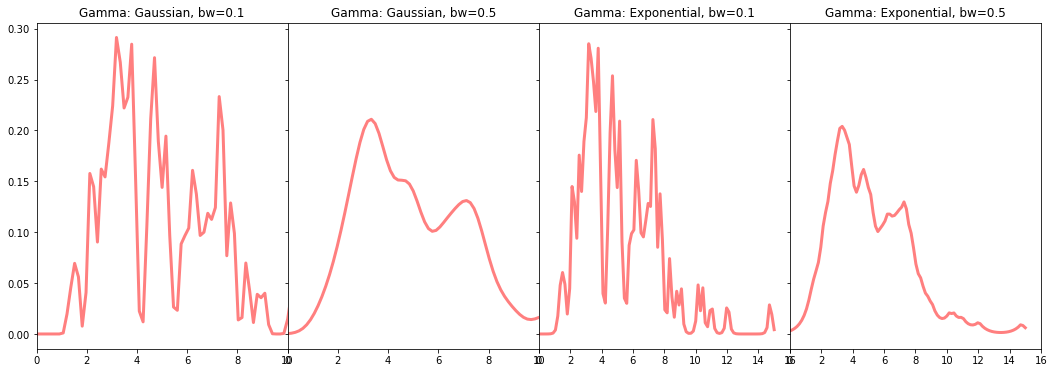

In [151]:
hours = np.linspace(0,15,100)
freq = sample_gamma;
# Plot the kernel density estimates
fig, ax = plt.subplots(1,4, sharey=True, figsize=(18,6))
fig.subplots_adjust(wspace=0)

for (i,bw) in enumerate([0.1,0.5,0.1,0.5]):
    # sklearn
    kde_skl_gaussian = KernelDensity(kernel="gaussian", bandwidth=bw)
    kde_skl_exponential = KernelDensity(kernel="exponential", bandwidth=bw)
    if i == 0 or i == 1:
        kde_skl_gaussian.fit(freq[:,np.newaxis])
        density = np.exp(kde_skl_gaussian.score_samples(hours[:,np.newaxis]))
        ax[i].plot(hours, density, color='red', alpha=0.5, lw=3)
        ax[i].set_title('Gamma: Gaussian, bw={0}'.format(bw))
        ax[i].set_xlim(0,10)
    else:
        kde_skl_exponential.fit(freq[:,np.newaxis])
        density = np.exp(kde_skl_exponential.score_samples(hours[:,np.newaxis]))
        ax[i].plot(hours, density, color='red', alpha=0.5, lw=3)
        ax[i].set_title('Gamma: Exponential, bw={0}'.format(bw))
        ax[i].set_xlim(0,16)

Next, Exponential.

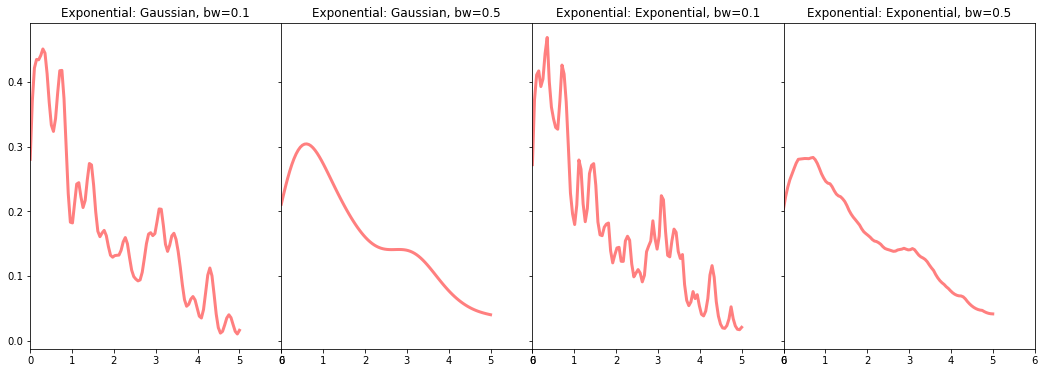

In [152]:
hours = np.linspace(0,5,100)
freq = sample_exponential;
# Plot the kernel density estimates
fig, ax = plt.subplots(1,4, sharey=True, figsize=(18,6))
fig.subplots_adjust(wspace=0)

for (i,bw) in enumerate([0.1,0.5,0.1,0.5]):
    # sklearn
    kde_skl_gaussian = KernelDensity(kernel="gaussian", bandwidth=bw)
    kde_skl_exponential = KernelDensity(kernel="exponential", bandwidth=bw)
    if i == 0 or i == 1:
        kde_skl_gaussian.fit(freq[:,np.newaxis])
        density = np.exp(kde_skl_gaussian.score_samples(hours[:,np.newaxis]))
        ax[i].plot(hours, density, color='red', alpha=0.5, lw=3)
        ax[i].set_title('Exponential: Gaussian, bw={0}'.format(bw))
        ax[i].set_xlim(0,6)
    else:
        kde_skl_exponential.fit(freq[:,np.newaxis])
        density = np.exp(kde_skl_exponential.score_samples(hours[:,np.newaxis]))
        ax[i].plot(hours, density, color='red', alpha=0.5, lw=3)
        ax[i].set_title('Exponential: Exponential, bw={0}'.format(bw))
        ax[i].set_xlim(0,6)

In the end, Cauchy.

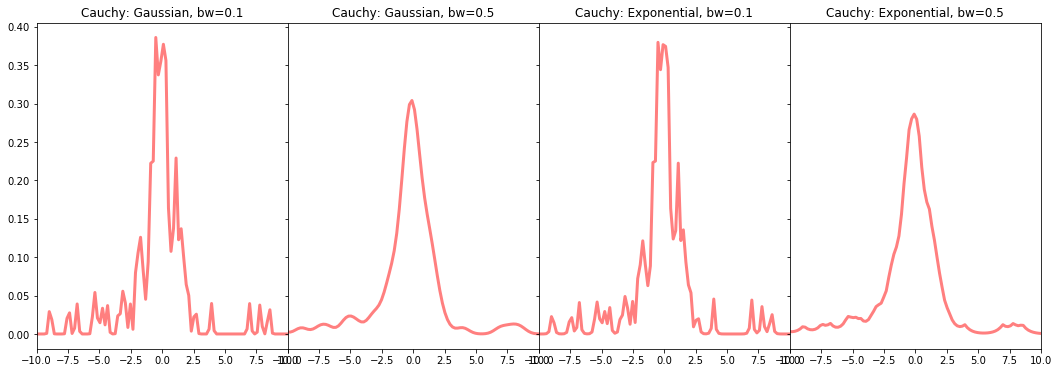

In [163]:
hours = np.linspace(-10,10,100)
freq = sample_cauchy;
# Plot the kernel density estimates
fig, ax = plt.subplots(1,4, sharey=True, figsize=(18,6))
fig.subplots_adjust(wspace=0)

for (i,bw) in enumerate([0.1,0.5,0.1,0.5]):
    # sklearn
    kde_skl_gaussian = KernelDensity(kernel="gaussian", bandwidth=bw)
    kde_skl_exponential = KernelDensity(kernel="exponential", bandwidth=bw)
    if i == 0 or i == 1:
        kde_skl_gaussian.fit(freq[:,np.newaxis])
        density = np.exp(kde_skl_gaussian.score_samples(hours[:,np.newaxis]))
        ax[i].plot(hours, density, color='red', alpha=0.5, lw=3)
        ax[i].set_title('Cauchy: Gaussian, bw={0}'.format(bw))
        ax[i].set_xlim(-10,10)
    else:
        kde_skl_exponential.fit(freq[:,np.newaxis])
        density = np.exp(kde_skl_exponential.score_samples(hours[:,np.newaxis]))
        ax[i].plot(hours, density, color='red', alpha=0.5, lw=3)
        ax[i].set_title('Cauchy: Exponential, bw={0}'.format(bw))
        ax[i].set_xlim(-10,10)

8.2:

(1) For the $t_{\alpha}$ distribution, its CDF satisfies that $1-F(x)\sim$ $\frac{C}{x^{\alpha}}$ as $x\to+\infty$, so that we learn that once $1-F(x)$ is multiplied by a polynomial of degree $\alpha$, it is going to a constant. Hence, F is in the domain of attraction of $G_{1,k}$.

(3) By Theorem 8.6, it follows that 
\begin{align*}\lim_{t\to+\infty} \frac{1-F(t+xu)}{1-F(t)} &= \lim_{t\to+\infty}\frac{\int_{t+2x}^{\infty}f(x)dx}{\int_{t}^{\infty}f(x)dx}
\\& = \lim_{t\to+\infty}\frac{f(t+2x)}{f(t)}
\\&  = e^{-x},\end{align*} so $G_{3}$.